# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [2]:
# Importando os dados
link = "https://raw.githubusercontent.com/gfsilveira/ebac/main/"
link += "03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo_10/"
link += "Profissao-%20Cientista%20de%20Dados_M10_support%20material.csv"

df = pd.read_csv(link)
df.drop(["Unnamed: 0","index","data_ref"], axis=1, inplace=True)
df = df.dropna()
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


## 1 Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [3]:
# Separando a DataFrame em variáveis independentes (x) e dependente (y)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Obtendo os conjuntos de dados de teste e treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)
print(
    x_train.shape,
    x_test.shape,
    y_train.shape,
    y_test.shape
)

(9349, 12) (3117, 12) (9349,) (3117,)


In [4]:
# Construindo novamente a DataFrame, agora de treino
df_train = pd.DataFrame(columns=df.columns[:-1], data=x_train)
df_train['renda'] = y_train
df_train.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
8314,F,False,False,0,Assalariado,Superior completo,Casado,Casa,38,6.183562,2.0,False,5179.71
14357,M,False,False,0,Assalariado,Secundário,Casado,Casa,40,9.638356,2.0,False,1106.82
14255,F,True,True,0,Empresário,Secundário,Casado,Casa,49,6.890411,2.0,False,881.86
8010,F,False,True,1,Assalariado,Secundário,Casado,Casa,41,6.257534,3.0,False,2688.96
7164,F,False,False,0,Assalariado,Secundário,Casado,Casa,61,14.978082,2.0,True,6116.93


In [5]:
# Construindo novamente a DataFrame, agora de teste
df_test = pd.DataFrame(columns=df.columns[:-1], data=x_test)
df_test['renda'] = y_test
df_test.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
4826,F,False,True,1,Assalariado,Secundário,Casado,Casa,39,10.424658,3.0,False,5446.62
8194,F,True,True,2,Assalariado,Superior incompleto,Casado,Casa,31,0.276712,4.0,False,3309.63
11577,F,True,False,0,Assalariado,Secundário,Casado,Casa,44,4.049315,2.0,False,1138.72
8727,F,False,True,0,Servidor público,Superior completo,Casado,Casa,51,20.128767,2.0,False,1380.28
6165,F,True,False,0,Assalariado,Secundário,União,Com os pais,27,5.520548,2.0,False,3809.67


### Conclusão
- Usando o módulo trains_test_splite da biblioteca sklearn obtivemos os conjuntos de treino e teste.

---

## 2 Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?

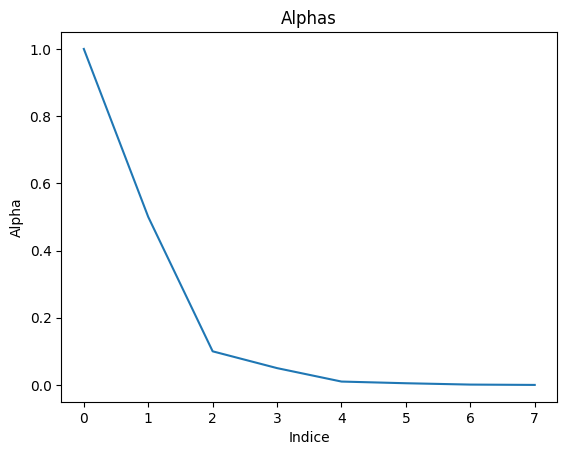

In [6]:
# Alphas para serem testados
alphas = [1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0]
plt.plot(alphas)
plt.title("Alphas")
plt.xlabel("Indice")
plt.ylabel("Alpha")
plt.show()

In [7]:
def mais_frequente(base: pd.DataFrame, coluna: str) -> None:
  '''
  Função que analisa as categorias na variável recebida, imprimindo a mais
  frequênte
  :param coluna (str): Nome da coluna à ser analisada.
  '''
  print(coluna)
  print(base[coluna].value_counts(normalize=True).index[0])

In [8]:
'''
Para obtendo o modelo de regressão com as categorias mais frequêntes
 nas caselas, verificou-se qual valor é mais frequênte em cada variável
'''
for c in range(8):
  mais_frequente(base=df_test, coluna=df.columns[c])
  print("-"*10)

mais_frequente(base=df_test, coluna=df.columns[10])
print("-"*10)
mais_frequente(base=df_test, coluna=df.columns[11])

sexo
F
----------
posse_de_veiculo
False
----------
posse_de_imovel
True
----------
qtd_filhos
0
----------
tipo_renda
Assalariado
----------
educacao
Secundário
----------
estado_civil
Casado
----------
tipo_residencia
Casa
----------
qt_pessoas_residencia
2.0
----------
mau
False


In [9]:
# Obtendo o modelo de regressão com as categorias mais frequêntes nas caselas
formula = '''
              np.log(renda) ~
                idade +
                tempo_emprego +
                C(sexo, Treatment('F')) +
                C(posse_de_veiculo, Treatment(False)) +
                C(posse_de_imovel, Treatment(True)) +
                C(qtd_filhos, Treatment(0)) +
                C(tipo_renda, Treatment('Assalariado')) +
                C(educacao, Treatment('Secundário')) +
                C(estado_civil, Treatment('Casado')) +
                C(tipo_residencia, Treatment('Casa')) +
                C(qt_pessoas_residencia, Treatment(2.0)) +
                C(mau, Treatment(False))
          '''

y, x = patsy.dmatrices(formula, df_test, return_type="dataframe")
x.head()

,Intercept,"C(sexo, Treatment('F'))[T.M]","C(posse_de_veiculo, Treatment(False))[T.True]","C(posse_de_imovel, Treatment(True))[T.False]","C(qtd_filhos, Treatment(0))[T.1]","C(qtd_filhos, Treatment(0))[T.2]","C(qtd_filhos, Treatment(0))[T.3]","C(qtd_filhos, Treatment(0))[T.4]","C(qtd_filhos, Treatment(0))[T.14]","C(tipo_renda, Treatment('Assalariado'))[T.Bolsista]",...,"C(tipo_residencia, Treatment('Casa'))[T.Governamental]","C(qt_pessoas_residencia, Treatment(2.0))[T.1.0]","C(qt_pessoas_residencia, Treatment(2.0))[T.3.0]","C(qt_pessoas_residencia, Treatment(2.0))[T.4.0]","C(qt_pessoas_residencia, Treatment(2.0))[T.5.0]","C(qt_pessoas_residencia, Treatment(2.0))[T.6.0]","C(qt_pessoas_residencia, Treatment(2.0))[T.15.0]","C(mau, Treatment(False))[T.True]",idade,tempo_emprego
4826,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.0,10.424658
8194,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,0.276712
11577,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,4.049315
8727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,20.128767
6165,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,5.520548


In [10]:
# Instanciando a regressão com todas as variáveis. Essa será usada como benchmarks
regressao_benchmarks = sm.OLS(y, x).fit()
print(regressao_benchmarks.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     33.96
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          7.00e-176
Time:                        12:23:21   Log-Likelihood:                -3298.4
No. Observations:                3117   AIC:                             6663.
Df Residuals:                    3084   BIC:                             6862.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [11]:
# Determinação do modelo com regularização Ridge, com L1_wt = 0
L1_wt = 0
modelo = smf.ols(formula, data=df_test)
regressao_ridge = modelo.fit_regularized(
                                    method = 'elastic_net',
                                    refit=True,
                                    L1_wt=L1_wt,
                                    alpha=alphas[0]
)
try:
  print(regressao_ridge.summary())
except NotImplementedError:
  print("NotImplementedError")

NotImplementedError


In [12]:
# Usar o valor 0 não foi possível. Selecionando um googol como L1_wt
L1_wt = 1/(10**100)
L1_wt

1e-100

In [13]:
# Determinação do modelo com regularização Ridge, com L1_wt = 1e-100
L1_wt = 1/(10**100)

# Testando para verificar se a função aceita o L1_wt
regressao_ridge = modelo.fit_regularized(
                                    method = 'elastic_net',
                                    refit=True,
                                    L1_wt=L1_wt,
                                    alpha=alphas[0]
)

print(regressao_ridge.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     31.03
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.17e-173
Time:                        12:23:24   Log-Likelihood:                -3298.4
No. Observations:                3117   AIC:                             6669.
Df Residuals:                    3082   BIC:                             6886.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [14]:
# Determinação do modelo com regularização Ridge, os diferentes alpha
for alpha in alphas:
  regressao_ridge = modelo.fit_regularized(
                                      method = 'elastic_net',
                                      refit=True,
                                      L1_wt=L1_wt,
                                      alpha=alpha
  )
  print("_"*100)
  print(f"Alpha         : {alpha}")
  print(f"R²            : {regressao_ridge.rsquared:.5f}")
  print(f"R² ajust      : {regressao_ridge.rsquared_adj:.5f}")
  print(f"AIC           : {regressao_ridge.aic:.5f}")
  print(f"Média p-value : {np.mean(regressao_ridge.pvalues):.5f}")

____________________________________________________________________________________________________
Alpha         : 1.0
R²            : 0.26055
R² ajust      : 0.25239
AIC           : 6668.86711
Média p-value : 0.40466
____________________________________________________________________________________________________
Alpha         : 0.5
R²            : 0.26055
R² ajust      : 0.25239
AIC           : 6668.86711
Média p-value : 0.40466
____________________________________________________________________________________________________
Alpha         : 0.1
R²            : 0.26055
R² ajust      : 0.25239
AIC           : 6668.86711
Média p-value : 0.40466
____________________________________________________________________________________________________
Alpha         : 0.05
R²            : 0.26055
R² ajust      : 0.25239
AIC           : 6668.86711
Média p-value : 0.40466
____________________________________________________________________________________________________
Alpha         : 0.

### Conclusão
- O módulo fit_regularized do pacote ols do statsmodels não aceita que o valor de L1_wt seja 0. Usando esse hipeparâmetro, recebemos uma mensagem de erro. Para ter um ajuste mais próximo possível da regularização Ridge, reduzindo assim LASSO, foi usado o número google, 1e-100.

- Com isso foi possível determinar que a variação de alpha não resultou em mudanças nas métricas do modelo, sendo possível utilizar qualquer valor.

---

## 3 Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

In [15]:
# Determinação do modelo com regularização LASSO, com L1_wt = 1
L1_wt = 1
regressao_lasso = modelo.fit_regularized(
                                    method = 'elastic_net',
                                    refit=True,
                                    L1_wt=L1_wt,
                                    alpha=alphas[0]
)

print(regressao_lasso.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                      -4.350
Model:                            OLS   Adj. R-squared:                 -4.352
Method:                 Least Squares   F-statistic:                    -1266.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               1.00
Time:                        12:23:47   Log-Likelihood:                -6382.7
No. Observations:                3117   AIC:                         1.277e+04
Df Residuals:                    3115   BIC:                         1.279e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [16]:
# Determinação do modelo com regularização LASSO, os diferentes alpha
for alpha in alphas:
  regressao_lasso = modelo.fit_regularized(
                                      method = 'elastic_net',
                                      refit=True,
                                      L1_wt=L1_wt,
                                      alpha=alpha
  )
  print("_"*100)
  print(f"Alpha         : {alpha}")
  print(f"R²            : {regressao_lasso.rsquared:.5f}")
  print(f"R² ajust      : {regressao_lasso.rsquared_adj:.5f}")
  print(f"AIC           : {regressao_lasso.aic:.5f}")
  print(f"Média p-value : {np.mean(regressao_lasso.pvalues):.5f}")

____________________________________________________________________________________________________
Alpha         : 1.0
R²            : -4.35017
R² ajust      : -4.35188
AIC           : 12771.34148
Média p-value : nan
____________________________________________________________________________________________________
Alpha         : 0.5
R²            : -4.35017
R² ajust      : -4.35188
AIC           : 12771.34148
Média p-value : nan
____________________________________________________________________________________________________
Alpha         : 0.1
R²            : 0.23728
R² ajust      : 0.23655
AIC           : 6703.43764
Média p-value : nan
____________________________________________________________________________________________________
Alpha         : 0.05
R²            : 0.23728
R² ajust      : 0.23655
AIC           : 6703.43764
Média p-value : nan
____________________________________________________________________________________________________
Alpha         : 0.01
R²     

In [17]:
# Instanciando o modelo com o alpha que encontrou as melhores métricas
alpha = 0.005
regressao_lasso = modelo.fit_regularized(
                                    method = 'elastic_net',
                                    refit=True,
                                    L1_wt=L1_wt,
                                    alpha=alpha
)
print(regressao_lasso.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     106.7
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          5.83e-191
Time:                        12:23:56   Log-Likelihood:                -3308.6
No. Observations:                3117   AIC:                             6639.
Df Residuals:                    3107   BIC:                             6706.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

### Conclusão
- Foi possível obter o melhor modelo, com regularização LASSO, usando alpha = 0,005;

- Esse alpha foi selecionado pois AIC foi o menor entre os modelos, como R² e o R² ajustados os segundos melhores.

---

## 4 Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?

In [18]:
'''
Verificando como ficaria um modelo onde o valor de p-value das variáveis
para beta = 0 é menor que o limite de 0,01. Isso seria o equivalente a primeira
rodada do forward do stepwise.
'''
limite_in = 0.01
limite_out = 0.05
colunas_selecionadas = list(regressao_benchmarks.pvalues[regressao_benchmarks.pvalues <= limite_in].index)
regressao_forward = sm.OLS(y, x.loc[:,colunas_selecionadas]).fit()
print(regressao_forward.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     151.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          2.22e-192
Time:                        12:23:56   Log-Likelihood:                -3312.6
No. Observations:                3117   AIC:                             6641.
Df Residuals:                    3109   BIC:                             6690.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [19]:
def regressao_stepwise_generator(limite_in: str = 0.01,limite_out: str = 0.05):
  '''
    Função para instanciamento de regressão usando a técnica de seleção de 
    modelos por stepwise.
    :param limite_in (float) = 0.01: P-value limite para a aceitação da variável
    :param limite_out (float) = 0.05: P-value limite para a regeição da variável
    :return gen_regressao_stepwise (RegressionResultsWrapper): Modelo treinado.
  '''
  colunas_in = []

  # Inicio forward com uma variável
  for column in x.columns:

    # Insere a primeira variável
    colunas_in.append(column)

    # Instancia a Regressão
    gen_regressao_in = sm.OLS(y, x.loc[:,colunas_in]).fit()

    # Varefica quais as variáveis tiveram p-value < que o limite, removendo os superiores
    colunas_in = list(gen_regressao_in.pvalues[gen_regressao_in.pvalues < limite_in].index)


  # Inicio backward, com todas as variáveis.
  colunas_out = colunas_in
  for column in colunas_in:
    try:
      # Instancia a Regressão
      gen_regressao_stepwise = sm.OLS(y, x.loc[:,colunas_out]).fit()
      
      # Verifica quais as variáveis tiveram p-value > que o limite, removendo os inferiores
      colunas_out = list(gen_regressao_stepwise.pvalues[gen_regressao_stepwise.pvalues > limite_out].index)

      # Retira a primeira variável
      colunas_out.remove(column)
    except:
      pass
  
  # Retorna o modelo treinado
  return gen_regressao_stepwise

In [20]:
# Instanciando a regressão com a técnica stepwise
regressao_stepwise = regressao_stepwise_generator()
print(regressao_stepwise.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     249.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          8.06e-186
Time:                        12:23:57   Log-Likelihood:                -3336.0
No. Observations:                3117   AIC:                             6682.
Df Residuals:                    3112   BIC:                             6712.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

### Conclusão
- O treinamento usando a técnica stepwise retornou um modelo com menos variáveis, com valores de p-value, para beta = 0, menor que 0.001. O R² ficou menor que o benchmarks.

---

## 5 Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?

In [21]:
# Organizando as métricas dos modelos obtidos
modelos = "Benchmarks Ridge LASSO Forward Stepwise".split(" ")
df_metricas = pd.DataFrame(
    data={
        "Modelo": modelos,
        "R²": [
            regressao_benchmarks.rsquared,
            regressao_ridge.rsquared,
            regressao_lasso.rsquared,
            regressao_forward.rsquared,
            regressao_stepwise.rsquared
        ],
        "R² adj": [
            regressao_benchmarks.rsquared_adj,
            regressao_ridge.rsquared_adj,
            regressao_lasso.rsquared_adj,
            regressao_forward.rsquared_adj,
            regressao_stepwise.rsquared_adj
        ],
        "AIC": [
            regressao_benchmarks.aic,
            regressao_ridge.aic,
            regressao_lasso.aic,
            regressao_forward.aic,
            regressao_stepwise.aic
        ],
        "N vari": [
            len(regressao_benchmarks.pvalues),
            len(regressao_ridge.pvalues),
            len(regressao_lasso.pvalues),
            len(regressao_forward.pvalues),
            len(regressao_stepwise.pvalues)
        ],
        "Média p-value": [
            np.mean(regressao_benchmarks.pvalues),
            np.mean(regressao_ridge.pvalues),
            np.mean(regressao_lasso.pvalues),
            np.mean(regressao_forward.pvalues),
            np.mean(regressao_stepwise.pvalues)
        ],
    }
)
df_metricas

,Modelo,R²,R² adj,AIC,N vari,Média p-value
0,Benchmarks,0.260551,0.252879,6662.867105,35,0.404578
1,Ridge,0.260551,0.252394,6668.867105,35,0.404661
2,LASSO,0.255719,0.253563,6639.171710,35,NaN
3,Forward,0.253776,0.252096,6641.296492,8,0.000552
4,Stepwise,0.242490,0.241516,6682.086158,5,0.000142


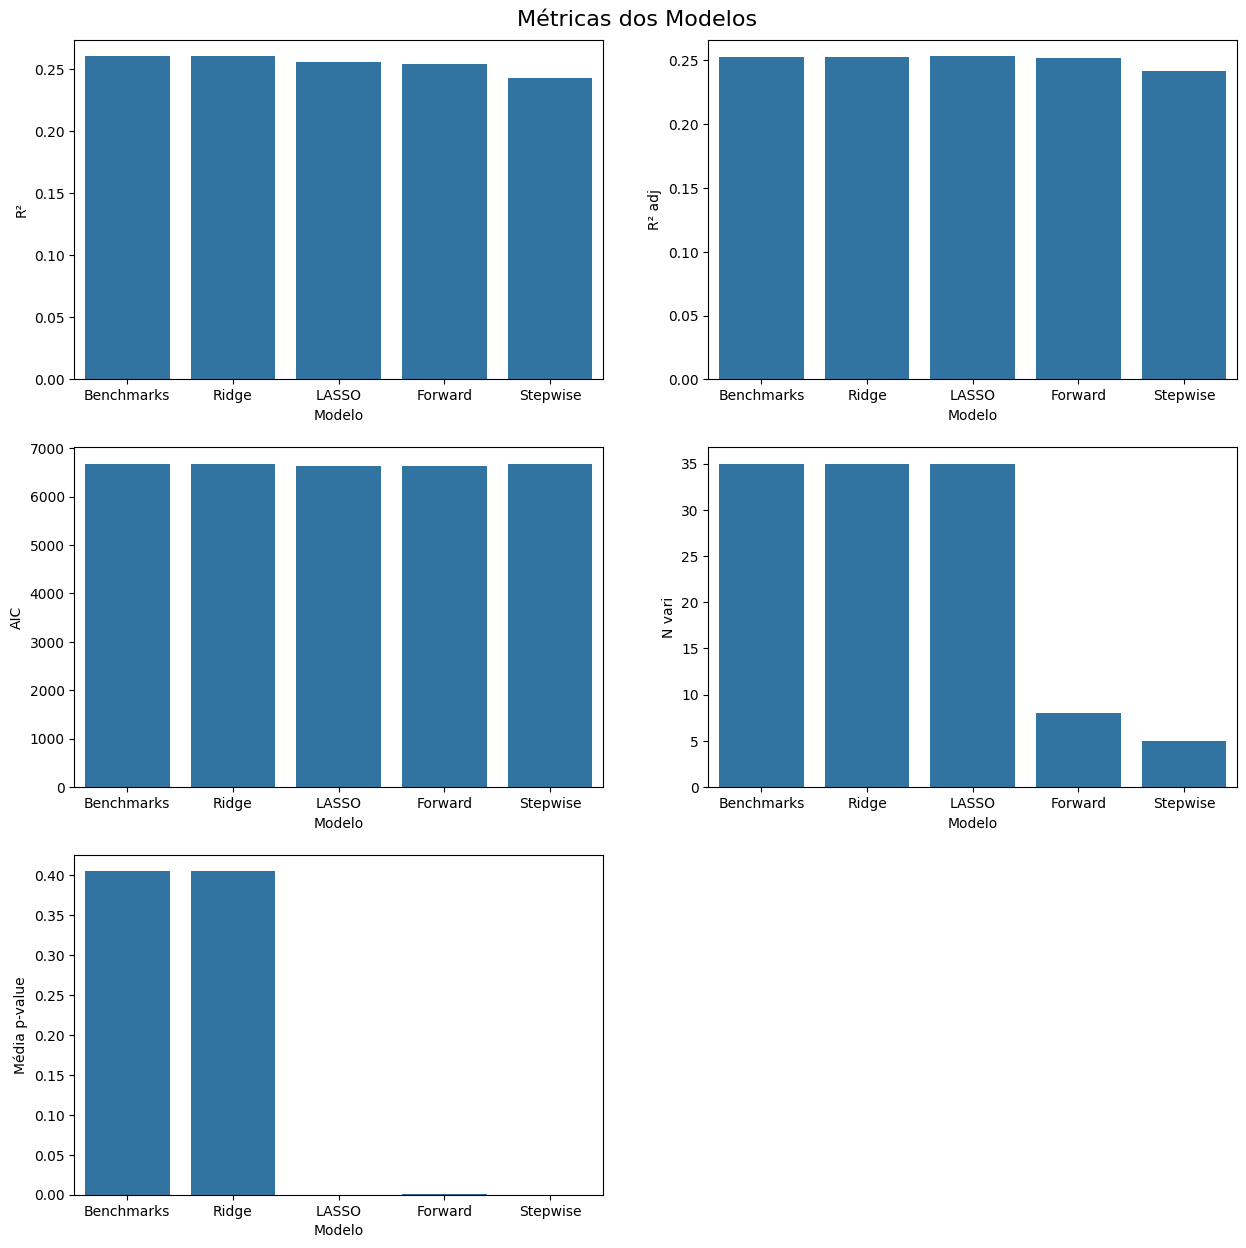

In [22]:
# Plotando as métricas dos modelos treinados.
fig, ax = plt.subplots(3,2, figsize=(15,15))
fig.delaxes(ax[2,1])

plt.suptitle("Métricas dos Modelos", y=.9, size=16)
sns.barplot(
    x="Modelo",
    y="R²",
    data=df_metricas,
    ax=ax[0,0]
)
sns.barplot(
    x="Modelo",
    y="R² adj",
    data=df_metricas,
    ax=ax[0,1]
)
sns.barplot(
    x="Modelo",
    y="AIC",
    data=df_metricas,
    ax=ax[1,0]
)
sns.barplot(
    x="Modelo",
    y="N vari",
    data=df_metricas,
    ax=ax[1,1]
)
sns.barplot(
    x="Modelo",
    y="Média p-value",
    data=df_metricas,
    ax=ax[2,0]
)
plt.show()

### Conclusão
- Foram obtidas 5 regressões usando diferentes técnicas.
<br>- Benchmarks: com todas as variáveis;
<br>- Ridge: Treinando o modelo com a técnica Ridge;
<br>- LASSO: Treinando o modelo com a técnica LASSO;
<br>- Forward: Modelo obtido com a primeira etapa do forward do stepwise;
<br>- Stepwise: Modelo obtido com o stepwise;

- Desses, o melhor modelo foi o Forward, com as métricas mais equilibradas. Foi considerado como melhor o modelo com maiores R², R² ajustado e menores AIC, número de variáveis no modelo e média do p-value das variáveis para beta = 0.

---

## 6 Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [23]:
# Instanciando uma DataFrame com as variáveis do melhor modelo
x_melhores = x.loc[:,colunas_selecionadas].copy()
x_melhores.head()

,Intercept,"C(sexo, Treatment('F'))[T.M]","C(posse_de_imovel, Treatment(True))[T.False]","C(tipo_renda, Treatment('Assalariado'))[T.Empresário]","C(tipo_renda, Treatment('Assalariado'))[T.Servidor público]","C(educacao, Treatment('Secundário'))[T.Superior completo]",idade,tempo_emprego
4826,1.0,0.0,0.0,0.0,0.0,0.0,39.0,10.424658
8194,1.0,0.0,0.0,0.0,0.0,0.0,31.0,0.276712
11577,1.0,0.0,1.0,0.0,0.0,0.0,44.0,4.049315
8727,1.0,0.0,0.0,0.0,1.0,1.0,51.0,20.128767
6165,1.0,0.0,1.0,0.0,0.0,0.0,27.0,5.520548


In [24]:
# Verificando as métricas do melhor modelo
print(regressao_forward.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     151.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          2.22e-192
Time:                        12:24:01   Log-Likelihood:                -3312.6
No. Observations:                3117   AIC:                             6641.
Df Residuals:                    3109   BIC:                             6690.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

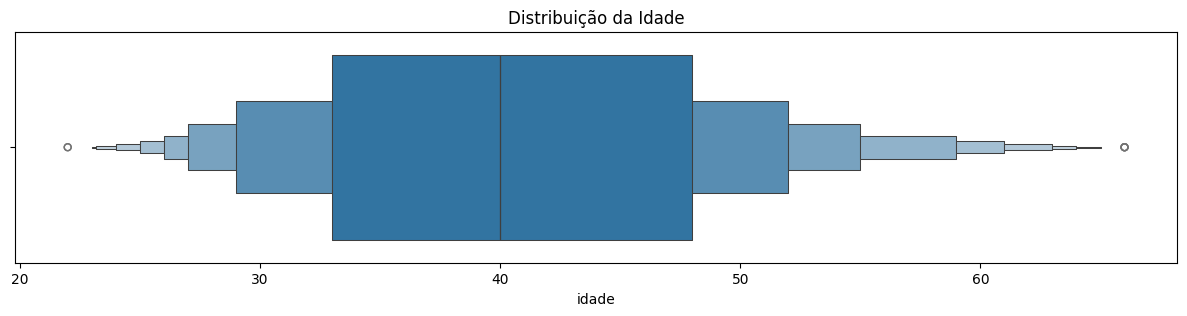

In [25]:
# Verificando a distribuição da variável idade
plt.figure(figsize=(15,3))
plt.title("Distribuição da Idade")
sns.boxenplot(
    x='idade',
    data=x_melhores
)
plt.show()

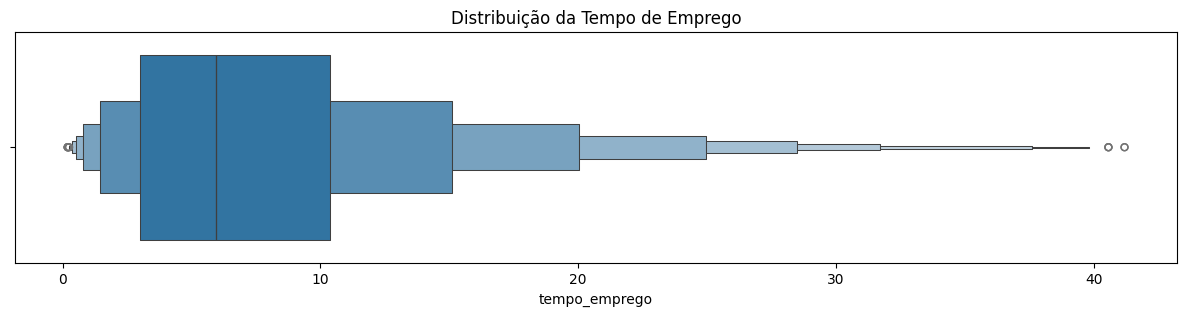

In [26]:
# Verificando a distribuição da variáel Tempo de Emprego
plt.figure(figsize=(15,3))
plt.title("Distribuição da Tempo de Emprego")
sns.boxenplot(
    x='tempo_emprego',
    data=x_melhores
)
plt.show()

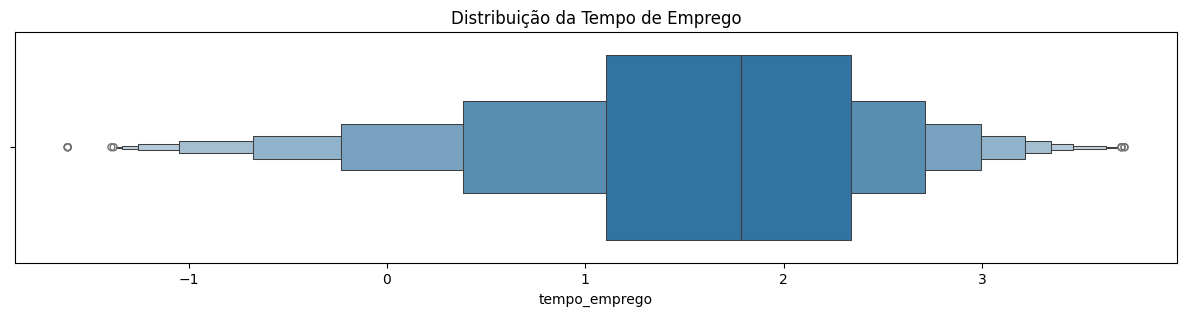

In [27]:
# Verificando a distribuição da variáel Tempo de Emprego, em log
x_melhores['tempo_emprego'] = np.log(x_melhores['tempo_emprego'])
plt.figure(figsize=(15,3))
plt.title("Distribuição da Tempo de Emprego")
sns.boxenplot(
    x='tempo_emprego',
    data=x_melhores
)
plt.show()

In [28]:
# Treinando um novo modelo, usando o Tempo de Emprego em log
regressao_melhor = sm.OLS(y, x_melhores).fit()
print(regressao_melhor.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     115.7
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          2.94e-151
Time:                        12:24:03   Log-Likelihood:                -3408.1
No. Observations:                3117   AIC:                             6832.
Df Residuals:                    3109   BIC:                             6881.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [29]:
# Verificando se o a mudança de alpha, para um treinamento com LASSO
x_melhores = x.loc[:,colunas_selecionadas].copy()
modelo = sm.OLS(y, x_melhores)
L1_wt = 1
for alpha in alphas:
  regressao_melhores_lasso = modelo.fit_regularized(
                                      method = 'elastic_net',
                                      refit=True,
                                      L1_wt=L1_wt,
                                      alpha=alpha
  )

  print("_"*100)
  print(f"Alpha   : {alpha}")
  print(f"R²      : {regressao_melhores_lasso.rsquared:.5f}")
  print(f"R² ajust: {regressao_melhores_lasso.rsquared_adj:.5f}")
  print(f"AIC     : {regressao_melhores_lasso.aic:.5f}")

____________________________________________________________________________________________________
Alpha   : 1.0
R²      : -4.35017
R² ajust: -4.35188
AIC     : 12771.34148
____________________________________________________________________________________________________
Alpha   : 0.5
R²      : -4.35017
R² ajust: -4.35188
AIC     : 12771.34148
____________________________________________________________________________________________________
Alpha   : 0.1
R²      : 0.23728
R² ajust: 0.23655
AIC     : 6703.43764
____________________________________________________________________________________________________
Alpha   : 0.05
R²      : 0.23728
R² ajust: 0.23655
AIC     : 6703.43764
____________________________________________________________________________________________________
Alpha   : 0.01
R²      : 0.25378
R² ajust: 0.25210
AIC     : 6643.29649
____________________________________________________________________________________________________
Alpha   : 0.005
R²      : 0.253

In [30]:
# Melhor alpha para um modelo Lasso
alpha = 0.01
regressao_melhores_lasso = modelo.fit_regularized(
                                  method = 'elastic_net',
                                  refit=True,
                                  L1_wt=L1_wt,
                                  alpha=alpha
)
print(regressao_melhores_lasso.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     132.2
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          2.45e-191
Time:                        12:24:06   Log-Likelihood:                -3312.6
No. Observations:                3117   AIC:                             6643.
Df Residuals:                    3109   BIC:                             6698.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [31]:
# Incluindo o modelo Forward, ajustado com LASSO
df_metricas_melhor = {
        df_metricas.columns[0]: "Forward LASSO",
        df_metricas.columns[1]: regressao_melhores_lasso.rsquared,
        df_metricas.columns[2]: regressao_melhores_lasso.rsquared_adj,
        df_metricas.columns[3]: regressao_melhores_lasso.aic,
        df_metricas.columns[4]: len(regressao_melhores_lasso.pvalues),
        df_metricas.columns[5]: np.mean(regressao_melhores_lasso.pvalues),
    }
df_metricas_melhor = pd.DataFrame(df_metricas_melhor, index=[len(df_metricas.index)+1])
df_metricas = pd.concat([df_metricas, df_metricas_melhor])
df_metricas

,Modelo,R²,R² adj,AIC,N vari,Média p-value
0,Benchmarks,0.260551,0.252879,6662.867105,35,0.404578
1,Ridge,0.260551,0.252394,6668.867105,35,0.404661
2,LASSO,0.255719,0.253563,6639.171710,35,NaN
3,Forward,0.253776,0.252096,6641.296492,8,0.000552
4,Stepwise,0.242490,0.241516,6682.086158,5,0.000142
6,Forward LASSO,0.253776,0.252096,6643.296492,8,0.000552


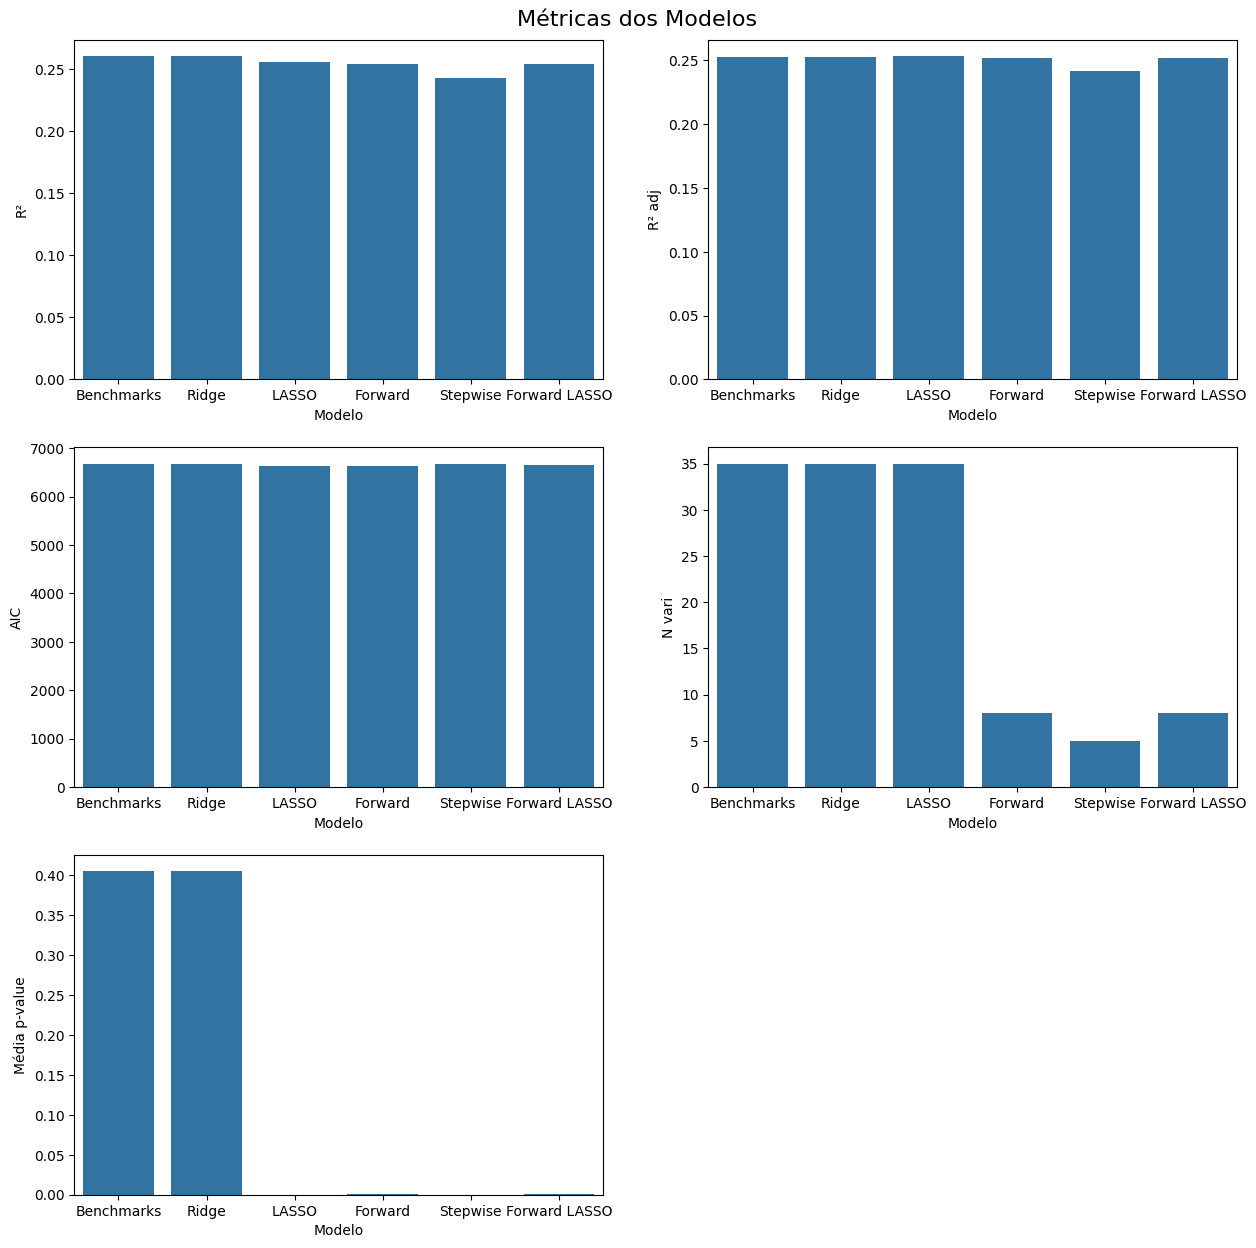

In [32]:
# Plotando as métricas dos modelos treinados.
fig, ax = plt.subplots(3,2, figsize=(15,15))
fig.delaxes(ax[2,1])

plt.suptitle("Métricas dos Modelos", y=.9, size=16)
sns.barplot(
    x="Modelo",
    y="R²",
    data=df_metricas,
    ax=ax[0,0]
)
sns.barplot(
    x="Modelo",
    y="R² adj",
    data=df_metricas,
    ax=ax[0,1]
)
sns.barplot(
    x="Modelo",
    y="AIC",
    data=df_metricas,
    ax=ax[1,0]
)
sns.barplot(
    x="Modelo",
    y="N vari",
    data=df_metricas,
    ax=ax[1,1]
)
sns.barplot(
    x="Modelo",
    y="Média p-value",
    data=df_metricas,
    ax=ax[2,0]
)
plt.show()

### Conclusão
- Iniciado o teste conferindo as métricas do melhor modelo, o Forward.
- A primeira estratégia foi transformar a variável quantitativa idade para log, porém, essa variável já está em uma distribuição normal, portanto, não teria efeito na mética do modelo.
- A segunda estratégia foi transformar a variável tempo de emprego para log. O modelo obtido com essa transformação teve um R² pior do que o Forward e por isso foi descartado.
- A terceira estratégia foi aplicar a técnica Lasso na regressão Forward. Usando os mesmo alpha da seção anterior, analisou-se as melhores métricas. O melhor modelo, segundo as métricas, foi um Forward LASSO com alpha = 0,01.
- Esse foi incorporado na DataFrame com as métricas.

---

## 7 Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [33]:
# Instanciando os objetos com os algoritmos de árvores
arvore_2 = DecisionTreeRegressor(max_depth=2)
arvore_8 = DecisionTreeRegressor(max_depth=8)

# Treinando os algoritmos
arvore_2.fit(x_melhores, y)
arvore_8.fit(x_melhores, y)

DecisionTreeRegressor(max_depth=8)

In [34]:
# Verificando as métricas treino
mse2 = arvore_2.score(x_melhores.loc[:,colunas_selecionadas], y)
mse8 = arvore_8.score(x_melhores.loc[:,colunas_selecionadas], y)

template = "O R² da árvore com profundidade {0} é: {1:.2f}"

print("Treinamento")
print(template.format(arvore_2.get_depth(), mse2).replace(".",","))
print(template.format(arvore_8.get_depth(), mse8).replace(".",","))

Treinamento
O R² da árvore com profundidade 2 é: 0,19
O R² da árvore com profundidade 8 é: 0,39


### Conclusão
- Duas árvores foram ajustadas, com 2 e 8 folhas de profundidade.
- A árvore de 8 folhas apresentou um R² melhor que o Benchmarks, e será usada na sequência da tarefa.

---

## 8 Avalie a previsão mediana do log(renda) nas bases de treinamento e teste. A previsão mediana do log(renda), por hipótese, é o mesmo que a previsão média do logo(renda).

In [35]:
# Obtendo os conjuntos de treino e teste usando as variáveis do modelo Forward.
formula = '''
              np.log(renda) ~
                idade +
                tempo_emprego +
                C(sexo, Treatment('F')) +
                C(posse_de_veiculo, Treatment(False)) +
                C(posse_de_imovel, Treatment(True)) +
                C(qtd_filhos, Treatment(0)) +
                C(tipo_renda, Treatment('Assalariado')) +
                C(educacao, Treatment('Secundário')) +
                C(estado_civil, Treatment('Casado')) +
                C(tipo_residencia, Treatment('Casa')) +
                C(qt_pessoas_residencia, Treatment(2.0)) +
                C(mau, Treatment(False))
          '''

y_train, x_train = patsy.dmatrices(formula, df_train, return_type="dataframe")
x_train = x_train.loc[:,colunas_selecionadas]

y_test, x_test = patsy.dmatrices(formula, df_test, return_type="dataframe")
x_test = x_test.loc[:,colunas_selecionadas]

print(
    x_train.shape,
    x_test.shape,
    y_train.shape,
    y_test.shape,
)

(9349, 8) (3117, 8) (9349, 1) (3117, 1)


In [36]:
# Obtendo as previsões do modelo Forward e da Árvore 8
pred_train = regressao_forward.predict(x_train)
pred_test = regressao_forward.predict(x_test)
pred_train_arvore = arvore_8.predict(x_train)
pred_test_arvore = arvore_8.predict(x_test)
print(
    pred_train.shape,
    pred_test.shape,
    pred_train_arvore.shape,
    pred_test_arvore.shape
)

(9349,) (3117,) (9349,) (3117,)


In [37]:
# Instanciando uma DataFrame com as informações de y treino e as predições
data = {
        "y_train": y_train.values.reshape(1,-1)[0],
        "pred_train_reg": pred_train.values,
        "pred_train_arvore": pred_train_arvore,
    }
df_pred_train = pd.DataFrame(data)
df_pred_train.head()

,y_train,pred_train_reg,pred_train_arvore
0,8.552504,7.831265,8.019851
1,7.009246,8.423887,8.494478
2,6.782033,8.059588,7.874771
3,7.896910,7.828946,7.783169
4,8.718816,8.273918,8.078706


In [38]:
# Instanciando uma DataFrame com as informações de y teste e as predições
data = {
        "y_test": y_test.values.reshape(1,-1)[0],
        "pred_test_reg": pred_test.values,
        "pred_test_arvore": pred_test_arvore,
    }
df_pred_test = pd.DataFrame(data)
df_pred_test.head()

,y_test,pred_test_reg,pred_test_arvore
0,8.602751,8.029444,8.032834
1,8.104592,7.481263,7.513192
2,7.037660,7.644522,7.596673
3,7.230042,8.812268,8.517194
4,8.245298,7.639450,7.783169


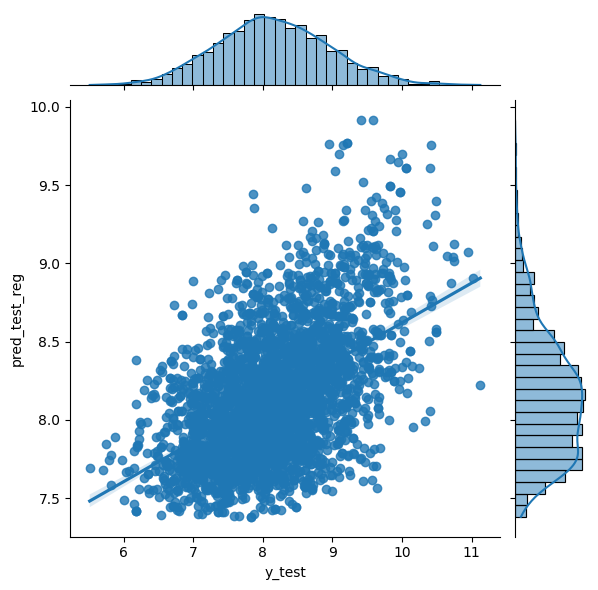

In [39]:
# Plot do conjunto de dados de teste, observado / predito na Regressão
sns.jointplot(
    x="y_test",
    y="pred_test_reg",
    kind="reg",
    data=df_pred_test
)
plt.show()

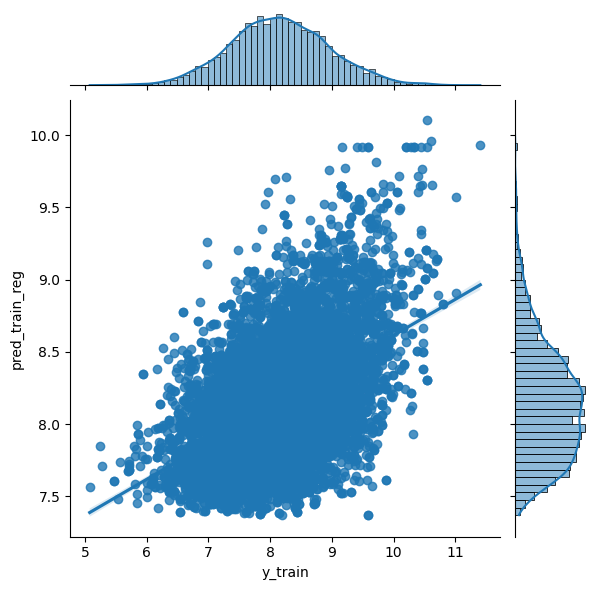

In [40]:
# Plot do conjunto de dados de treino, observado / predito na Regressão
sns.jointplot(
    x="y_train",
    y="pred_train_reg",
    kind="reg",
    data=df_pred_train
)
plt.show()

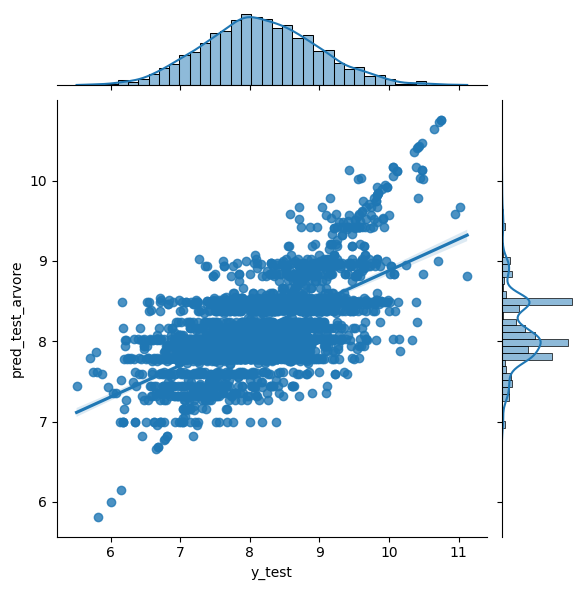

In [41]:
# Plot do conjunto de dados de teste, observado / predito na Árvore
sns.jointplot(
    x="y_test",
    y="pred_test_arvore",
    kind="reg",
    data=df_pred_test
)
plt.show()

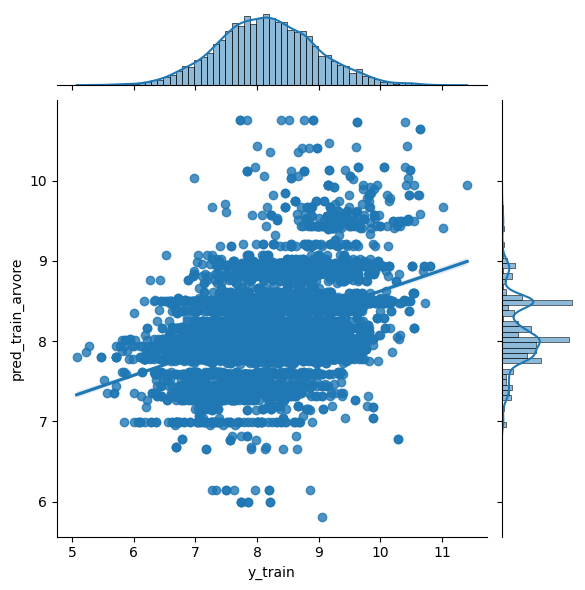

In [42]:
# Plot do conjunto de dados de treino, observado / predito na Árvore
sns.jointplot(
    x="y_train",
    y="pred_train_arvore",
    kind="reg",
    data=df_pred_train
)
plt.show()

In [43]:
# Obtendo as medidas resumo de teste
df_pred_test.describe()

,y_test,pred_test_reg,pred_test_arvore
count,3117.000000,3117.000000,3117.000000
mean,8.152138,8.152138,8.152138
std,0.810872,0.408486,0.508477
min,5.512339,7.381017,5.813922
25%,7.598279,7.834192,7.862197
50%,8.118222,8.110525,8.032834
75%,8.686065,8.391437,8.494478
max,11.124237,9.915078,10.752002


In [44]:
# Obtendo as medidas resumo de treino
df_pred_train.describe()

,y_train,pred_train_reg,pred_train_arvore
count,9349.000000,9349.000000,9349.000000
mean,8.156200,8.154995,8.140516
std,0.798357,0.410722,0.503605
min,5.074549,7.369947,5.813922
25%,7.617140,7.843679,7.796791
50%,8.142852,8.120558,8.032834
75%,8.685580,8.399028,8.494478
max,11.406654,10.103880,10.752002


### Conclusão
- A análise do gráfico de dispersão para o conjunto de teste e de treino, obtida pela Regressão, mostra uma distribuição normal, com apenas alguns pontos extremos.
- Já no gráfico dos dados da árvore, observa-se que a previsão foi menor homogênia, com pontos que aparentam uma distribuição menos Normal, quase como categorias. Ainda se observa os mesmo pontos extremos.
- Analisando as medianas, e as médias, dos dados observados em teste e treino, da árvore e da regressão, todos ficam aproximadamente em 8,1, o que pode ser devido a transformação da variável renda, uma vez que o R² não se mostra próximo de 1 em nenhuma dos modelos.
- Médias e medianas próximas apontam para uma distribuição normal dos dados, como é visto nos histogramas.



---



## 9 Obtenha a previsão mediana da renda - a mediana é o exponencial do item anterior. Observe que para a média não vale o mesmo resultado.

In [45]:
# Transformando os dados observados e preditos com exp
df_pred_test_orig = np.exp(df_pred_test).copy()
df_pred_test_orig.describe()

,y_test,pred_test_reg,pred_test_arvore
count,3117.000000,3117.000000,3117.000000
mean,4883.942679,3807.476830,4056.085336
std,5049.569338,1925.734311,3260.938679
min,247.730000,1605.221021,334.930000
25%,1994.760000,2525.494978,2597.219980
50%,3355.050000,3329.326979,3080.458956
75%,5919.840000,4409.147594,4887.706694
max,67794.540000,20233.153560,46723.480000


In [46]:
# Transformando os dados observados e preditos com exp
df_pred_train_orig = np.exp(df_pred_train).copy()
df_pred_train_orig.describe()

,y_train,pred_train_reg,pred_train_arvore
count,9349.000000,9349.000000,9349.000000
mean,4838.743698,3824.480193,3985.604825
std,4813.161447,1975.065851,3119.031241
min,159.900000,1587.549766,334.930000
25%,2032.740000,2549.568392,2432.783340
50%,3438.710000,3362.896824,3080.458956
75%,5916.970000,4442.745300,4887.706694
max,89918.040000,24437.648044,46723.480000


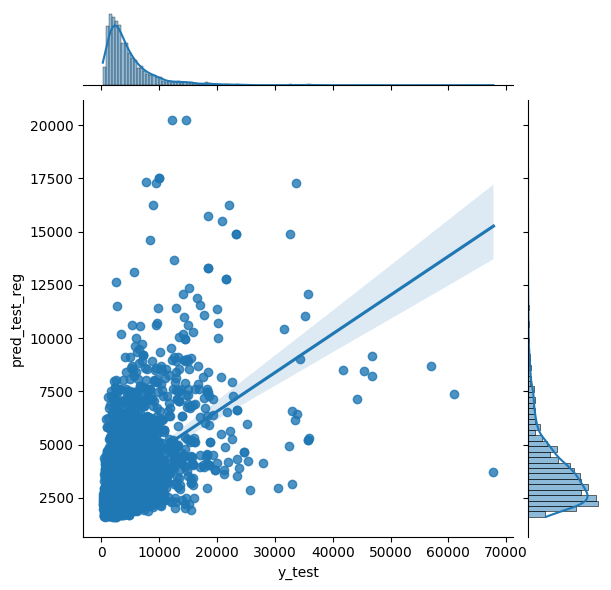

In [47]:
# Plot do conjunto de dados de teste, observado / predito na Regressão
sns.jointplot(
    x="y_test",
    y="pred_test_reg",
    kind="reg",
    data=df_pred_test_orig
)
plt.show()

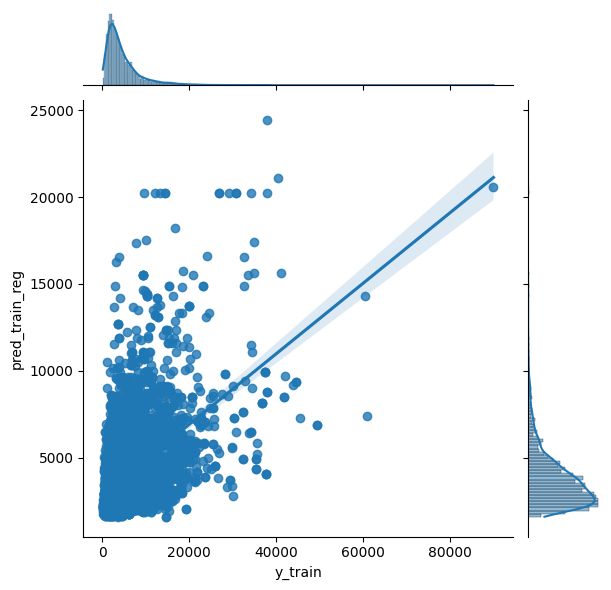

In [48]:
# Plot do conjunto de dados de treino, observado / predito na Regressão
sns.jointplot(
    x="y_train",
    y="pred_train_reg",
    kind="reg",
    data=df_pred_train_orig
)
plt.show()

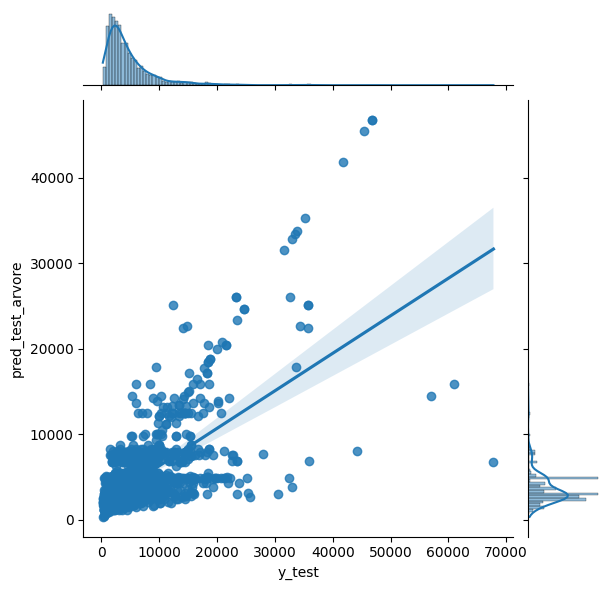

In [49]:
# Plot do conjunto de dados de teste, observado / predito na Árvore
sns.jointplot(
    x="y_test",
    y="pred_test_arvore",
    kind="reg",
    data=df_pred_test_orig
)
plt.show()

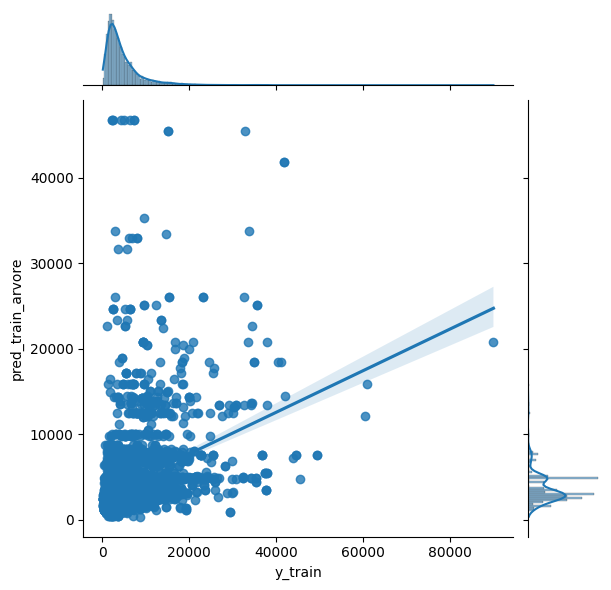

In [50]:
# Plot do conjunto de dados de treino, observado / predito na Árvore
sns.jointplot(
    x="y_train",
    y="pred_train_arvore",
    kind="reg",
    data=df_pred_train_orig
)
plt.show()

### Conclusão
- Como observado anteriormente, transformar os dados para escala original, com o expolêncial do log, retornou os dados para uma distribuição que foge da normal.
- Médias e medianas, em todas as condições, se distânciam.
- As medianas e as médias das rendas observadas no teste e no treino dos dados observados são mais próximas das medianas da Regressão do que da Árvore.



---



## 10 Divida a previsão do item 9 em 10 grupos. Calcule a média, mediana, percentil 5% e percentil 95% da renda para cada grupo. Faça um gráfico. Analise e comente as limitações dessa previsão, e replita sobre o quão útil é este modelo.

In [51]:
# Instanciando classes para a separação dos dados em 10 grupos
label = "a b c d e f g h i j".split(" ")
len(label)

10

In [52]:
'''
Usando o módulo qcut, as previsões da Regressão na base de teste e treino,
foram categorizadas
'''
df_pred_test_orig['pred_test_reg_cut'] = pd.qcut(
                                          x=df_pred_test_orig.pred_test_reg,
                                          q=10,
                                          labels=label
)
df_pred_train_orig['pred_train_reg_cut'] = pd.qcut(
                                        x=df_pred_train_orig.pred_train_reg,
                                        q=10,
                                        labels=label
)

In [53]:
def quant_cinco(a: pd.Series) -> float:
  '''
  Função que recebe um valor e retorna o quantile 5%
  :param a (pd.Series): Conjunto de dados para calculo do quantile.
  :return (float): Ponto de 5% do conjunto de dados.
  '''
  return np.quantile(a=a, q=0.05)

def quant_noventacinco(a: pd.Series) -> float:
  '''
  Função que recebe um valor e retorna o quantile 95%
  :param a (pd.Series): Conjunto de dados para calculo do quantile.
  :return (float): Ponto de 95% do conjunto de dados.
  '''
  return np.quantile(a=a, q=0.95)

In [54]:
# Obtendo as medidas resumo na base de dados test da Regressão
calculos = (np.mean, np.median, quant_cinco, quant_noventacinco)
selec = {
    'pred_test_reg': calculos
}
df_pred_test_orig_grouped_reg = df_pred_test_orig.groupby('pred_test_reg_cut').agg(selec).round(2)
df_pred_test_orig_grouped_reg.columns = df_pred_test_orig_grouped_reg.columns.droplevel(0)
df_pred_test_orig_grouped_reg.reset_index(inplace=True)
df_pred_test_orig_grouped_reg

,pred_test_reg_cut,mean,median,quant_cinco,quant_noventacinco
0,a,1953.61,1987.81,1671.91,2130.93
1,b,2271.02,2274.38,2158.88,2379.93
2,c,2525.06,2528.28,2407.49,2659.75
3,d,2843.18,2847.86,2698.39,2969.67
4,e,3168.60,3164.23,3006.00,3314.44
5,f,3520.01,3517.37,3362.99,3688.50
6,g,3912.54,3901.40,3740.44,4087.28
7,h,4434.29,4410.00,4134.63,4762.40
8,i,5267.02,5183.73,4837.05,5905.03
9,j,8196.58,7364.90,6154.03,13481.49


In [55]:
# Obtendo as medidas resumo na base de dados treino da Regressão
selec = {
    'pred_train_reg': calculos
}
df_pred_train_orig_grouped_reg = df_pred_train_orig.groupby('pred_train_reg_cut').agg(selec).round(2)
df_pred_train_orig_grouped_reg.columns = df_pred_train_orig_grouped_reg.columns.droplevel(0)
df_pred_train_orig_grouped_reg.reset_index(inplace=True)
df_pred_train_orig_grouped_reg

,pred_train_reg_cut,mean,median,quant_cinco,quant_noventacinco
0,a,1944.30,1962.55,1690.23,2114.02
1,b,2267.26,2266.77,2143.91,2389.06
2,c,2550.88,2549.57,2420.26,2682.41
3,d,2845.91,2848.38,2714.23,2977.65
4,e,3181.39,3182.75,3012.78,3338.40
5,f,3537.03,3531.06,3375.15,3715.92
6,g,3924.68,3920.95,3758.10,4121.71
7,h,4451.61,4443.03,4178.55,4727.88
8,i,5277.99,5218.53,4793.23,5894.00
9,j,8281.19,7335.96,6042.86,14319.29


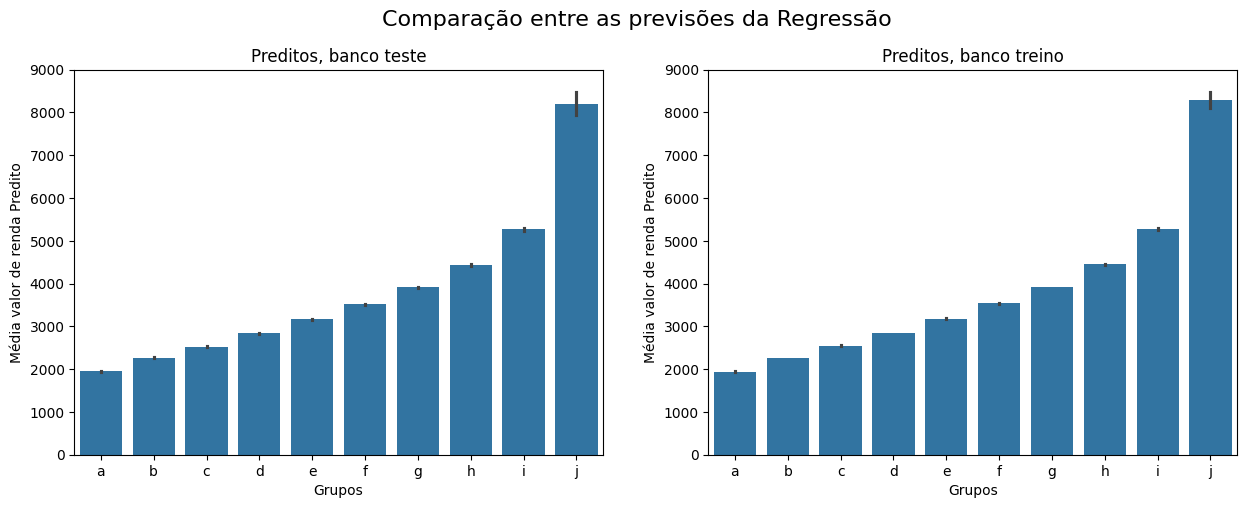

In [56]:
# Plotando as Médias de renda preditas pela regressão, para cada classe
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle("Comparação entre as previsões da Regressão", y=1, size=16)
f = sns.barplot(
    y="pred_test_reg",
    x="pred_test_reg_cut",
    data=df_pred_test_orig,
    ax=ax[0]
)
ylim = (0, 9_000)
f.set(
    title = "Preditos, banco teste",
    xlabel = "Grupos",
    ylabel = "Média valor de renda Predito",
    ylim=ylim,
)
f = sns.barplot(
    y="pred_train_reg",
    x="pred_train_reg_cut",
    data=df_pred_train_orig,
    ax=ax[1]
)
f.set(
    title = "Preditos, banco treino",
    xlabel = "Grupos",
    ylabel = "Média valor de renda Predito",
    ylim=ylim,
)
plt.show()

In [57]:
'''
Usando o módulo qcut, as previsões da Árvore na base de teste e treino,
foram categorizadas
'''
df_pred_test_orig['pred_test_arvore_cut'] = pd.qcut(
                                          x=df_pred_test_orig.pred_test_arvore,
                                          q=10,
                                          labels=label
)
df_pred_train_orig['pred_train_arvore_cut'] = pd.qcut(
                                        x=df_pred_train_orig.pred_train_arvore,
                                        q=10,
                                        labels=label
)
df_pred_train_orig.head()

,y_train,pred_train_reg,pred_train_arvore,pred_train_reg_cut,pred_train_arvore_cut
0,5179.71,2518.113373,3040.724131,c,d
1,1106.82,4554.571177,4887.706694,h,h
2,881.86,3163.986929,2630.084190,e,c
3,2688.96,2512.280849,2399.867928,c,b
4,6116.93,3920.277524,3225.058265,g,f


In [58]:
# Obtendo as medidas resumo na base de dados teste da Árvore
selec = {
    'pred_test_arvore': calculos
}
df_pred_test_orig_grouped_arv = df_pred_test_orig.groupby('pred_test_arvore_cut').agg(selec).round(2)
df_pred_test_orig_grouped_arv.columns = df_pred_test_orig_grouped_arv.columns.droplevel(0)
df_pred_test_orig_grouped_arv.reset_index(inplace=True)
df_pred_test_orig_grouped_arv

,pred_test_arvore_cut,mean,median,quant_cinco,quant_noventacinco
0,a,1600.15,1565.56,1085.65,1991.56
1,b,2376.03,2399.87,2025.53,2432.78
2,c,2623.20,2630.08,2597.22,2630.08
3,d,2904.36,2842.80,2705.59,3040.72
4,e,3067.54,3055.52,3055.39,3080.46
5,f,3372.16,3439.83,3201.11,3503.07
6,g,4011.18,3810.41,3507.05,4401.72
7,h,4860.61,4887.71,4767.22,4887.71
8,i,5339.45,5101.95,4918.40,6747.65
9,j,11068.63,7912.82,6891.78,24723.34


In [59]:
# Obtendo as medidas resumo na base de dados treino da Árvore
selec = {
    'pred_train_arvore': calculos
}
df_pred_train_orig_grouped_arv = df_pred_train_orig.groupby('pred_train_arvore_cut').agg(selec).round(2)
df_pred_train_orig_grouped_arv.columns = df_pred_train_orig_grouped_arv.columns.droplevel(0)
df_pred_train_orig_grouped_arv.reset_index(inplace=True)
df_pred_train_orig_grouped_arv

,pred_train_arvore_cut,mean,median,quant_cinco,quant_noventacinco
0,a,1597.15,1681.19,1085.65,1991.56
1,b,2384.05,2399.87,2025.53,2432.78
2,c,2624.24,2630.08,2597.22,2630.08
3,d,2900.07,2842.80,2705.59,3040.72
4,e,3066.77,3055.52,3055.52,3080.46
5,f,3381.68,3503.07,3201.11,3503.07
6,g,4187.37,4352.00,3507.05,4767.22
7,h,4887.71,4887.71,4887.71,4887.71
8,i,5159.57,5000.01,4918.40,6110.70
9,j,10414.40,7824.77,6747.65,22605.49


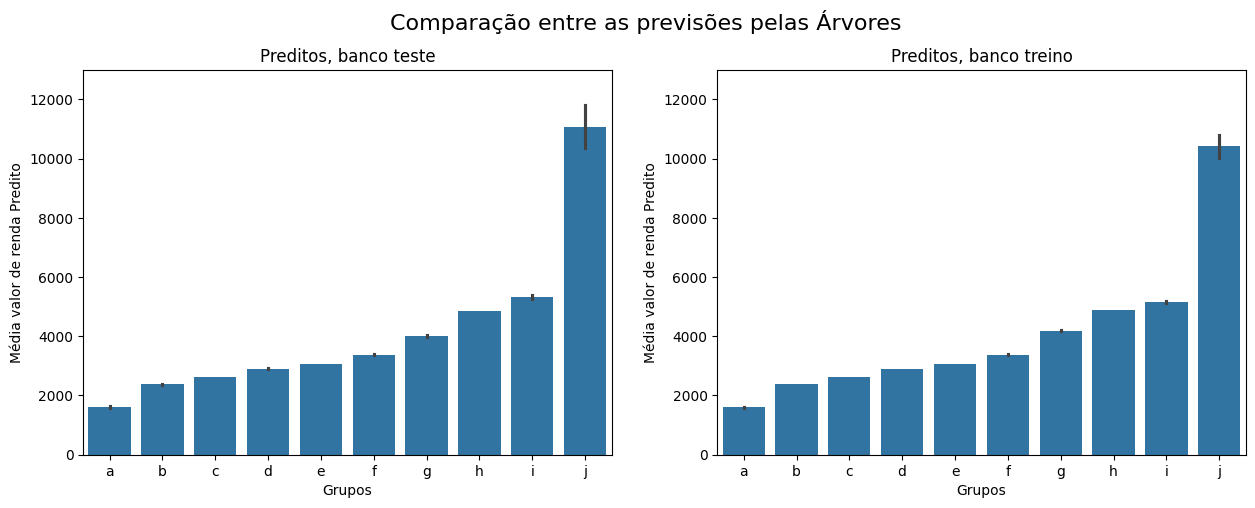

In [60]:
# Plotando as Médias de renda preditas pela regressão, para cada classe
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle("Comparação entre as previsões pelas Árvores", y=1, size=16)
f = sns.barplot(
    y="pred_test_arvore",
    x="pred_test_arvore_cut",
    data=df_pred_test_orig,
    ax=ax[0]
)
ylim = (0, 13_000)
f.set(
    title = "Preditos, banco teste",
    xlabel = "Grupos",
    ylabel = "Média valor de renda Predito",
    ylim=ylim,
)
f = sns.barplot(
    y="pred_train_arvore",
    x="pred_train_arvore_cut",
    data=df_pred_train_orig,
    ax=ax[1]
)
f.set(
    title = "Preditos, banco treino",
    xlabel = "Grupos",
    ylabel = "Média valor de renda Predito",
    ylim=ylim,
)
plt.show()

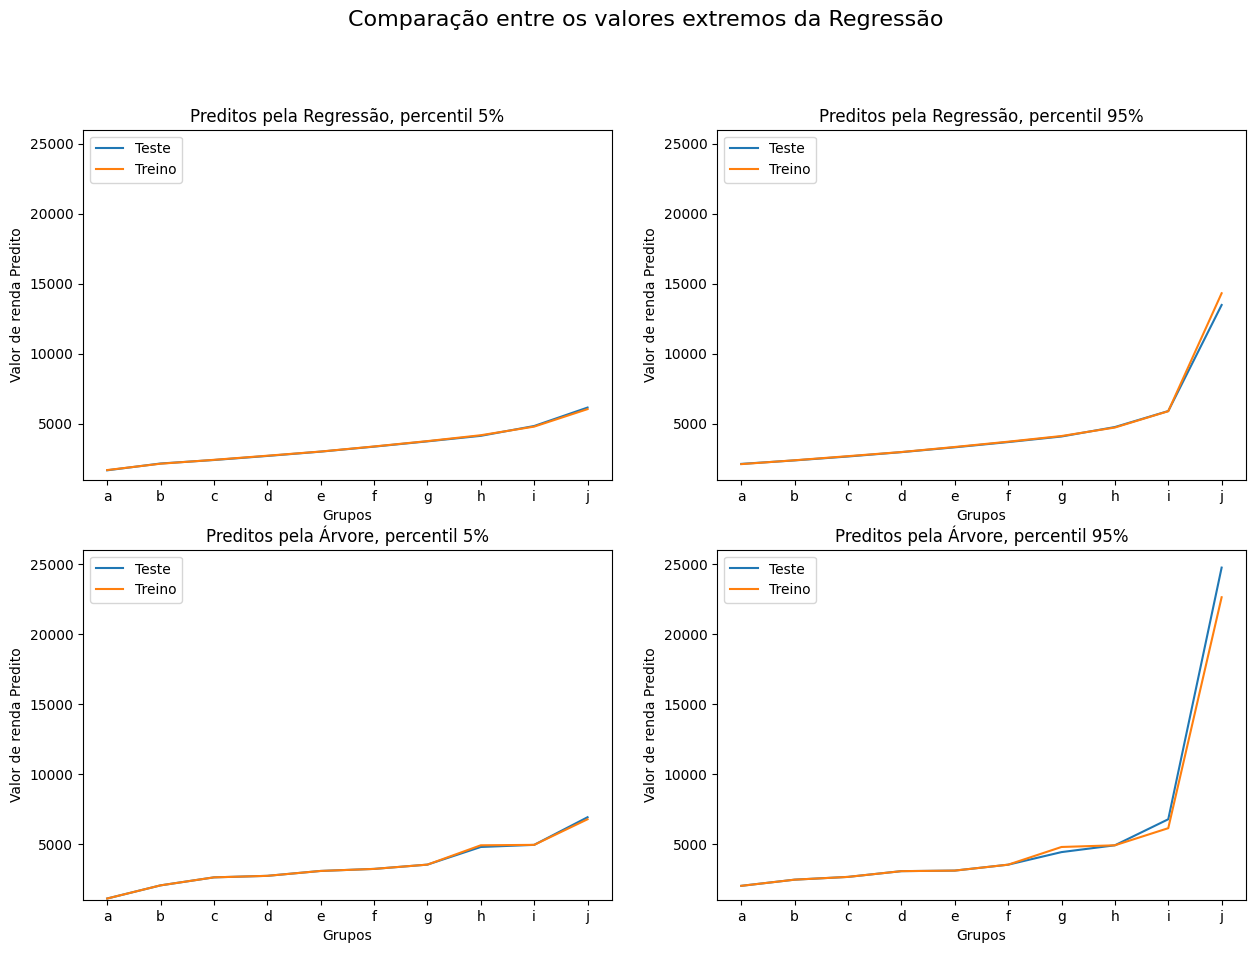

In [61]:
'''
Plote das previsões no conjunto de dados treino e test, para os quantiles 5% e
95%, para a Regressão e para a Árvore, em cada um dos conjuntos dos dados
'''
fig, ax = plt.subplots(2,2, figsize=(15,10))
plt.suptitle("Comparação entre os valores extremos da Regressão", y=1, size=16)
ylim = (1_000, 26_000)
# -----------------------------------------------------------------------
# Regressão 5%
f = sns.lineplot(
    x="pred_test_reg_cut",
    y="quant_cinco",
    data=df_pred_test_orig_grouped_reg,
    label="Teste",
    ax=ax[0,0]
)
# -----------------------------------------
g = sns.lineplot(
    x="pred_train_reg_cut",
    y="quant_cinco",
    data=df_pred_train_orig_grouped_reg,
    label="Treino",
    ax=ax[0,0]
)
g.set(
    title="Preditos pela Regressão, percentil 5%",
    xlabel="Grupos",
    ylabel="Valor de renda Predito",
    ylim=ylim,
)
g.legend(loc='upper left')
# -----------------------------------------------------------------------
# Regressão 95%
f = sns.lineplot(
    x="pred_test_reg_cut",
    y="quant_noventacinco",
    data=df_pred_test_orig_grouped_reg,
    label="Teste",
    ax=ax[0,1]
)
# -----------------------------------------
g = sns.lineplot(
    x="pred_train_reg_cut",
    y="quant_noventacinco",
    data=df_pred_train_orig_grouped_reg,
    label="Treino",
    ax=ax[0,1]
)
g.set(
    title="Preditos pela Regressão, percentil 95%",
    xlabel="Grupos",
    ylabel="Valor de renda Predito",
    ylim=ylim,
)
g.legend(loc='upper left')
# -----------------------------------------------------------------------
# -----------------------------------------------------------------------
# Árvore 5%
h = sns.lineplot(
    x="pred_test_arvore_cut",
    y="quant_cinco",
    data=df_pred_test_orig_grouped_arv,
    label="Teste",
    ax=ax[1,0]
)
# -----------------------------------------
i = sns.lineplot(
    x="pred_train_arvore_cut",
    y="quant_cinco",
    data=df_pred_train_orig_grouped_arv,
    label="Treino",
    ax=ax[1,0]
)
i.set(
    title="Preditos pela Árvore, percentil 5%",
    xlabel="Grupos",
    ylabel="Valor de renda Predito",
    ylim=ylim,
)
i.legend(loc='upper left')
# -----------------------------------------------------------------------
# Árvore 95%
h = sns.lineplot(
    x="pred_test_arvore_cut",
    y="quant_noventacinco",
    data=df_pred_test_orig_grouped_arv,
    label="Teste",
    ax=ax[1,1]
)
# -----------------------------------------
i = sns.lineplot(
    x="pred_train_arvore_cut",
    y="quant_noventacinco",
    data=df_pred_train_orig_grouped_arv,
    label="Treino",
    ax=ax[1,1]
)
i.set(
    title="Preditos pela Árvore, percentil 95%",
    xlabel="Grupos",
    ylabel="Valor de renda Predito",
    ylim=ylim,
)
i.legend(loc='upper left')
# -----------------------------------------------------------------------
plt.show()

### Conclusão
- O principal problema em predizer a renda usando as técnicas de Regressão e/ou Árvores, está no fato de que a renda não têm uma distribuição normal.
-É possível observar nos gráficos e nas médias e medianas que o quantile 95% cresce de forma abrupta, quando nos grupos mais elevados.
- A utilização do moedlo, portanto, é limitada por essas caracteristicas da renda, que não são corrigidas totalmente pela transformação.



---

